In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp
import pandas as pd
from os import listdir
from os.path import isfile, join
import pymc3 as pm
import math as m
import arviz as az

import dive
import matplotlib.pyplot as plt
import deerlab as dl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


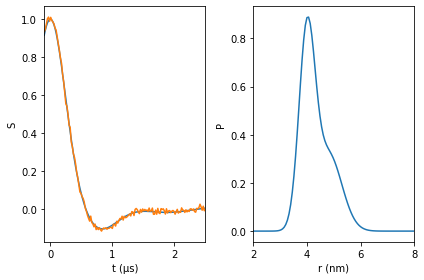

In [5]:
testdata, testpars = dive.generateMultiGauss(nr = 100, nt = 100)

t = testdata['t']
S = testdata['S']
Ptruth = testdata['P']
r = testdata['r']
S0 = testdata['S0']

sigma_model = testpars['sigma']


fig, ax = plt.subplots(1,2)
line0 = ax[0].plot(t, S0)
line1 = ax[0].plot(t, S)
line2 = ax[1].plot(r, Ptruth)

ax[0].set(xlim = [min(t),max(t)], xlabel = 't (µs)', ylabel = 'S')
ax[1].set(xlim = [min(r),max(r)], xlabel = 'r (nm)', ylabel = 'P')
plt.tight_layout()
plt.show()

In [6]:
K = dl.dipolarkernel(t,r,integralop=True)    # kernel matrix
K[:,0] = 2*K[:,0]
K[:,-1] = 2*K[:,-1]

In [7]:
KtK = np.matmul(np.transpose(K),K)
KtS = np.matmul(np.transpose(K),S)

L = dl.regoperator(np.linspace(1,len(r),len(r)), 2)
LtL = np.matmul(np.transpose(L),L)

In [8]:
a0 = 0.01
b0 = 1e-6

### Use this to verify that MATLAB and python randP have the same smoothness for a given alpha

alpha = 5
tau = 10000.0
delta = 250000.0


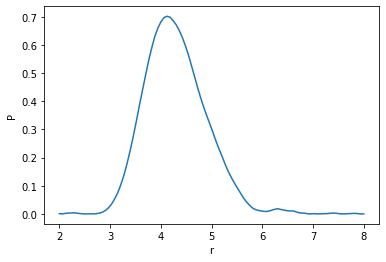

In [11]:
alpha = 5
tau = 1/sigma_model**2
delta = (alpha**2)*tau
print('alpha = ' + str(alpha))
print('tau = ' + str(tau))
print('delta = ' + str(delta))

Pdraw = dive.randP(delta,tau,KtK,KtS,LtL,len(r))

plt.plot(r,Pdraw)
plt.xlabel('r')
plt.ylabel('P');

alpha = 0.1
tau = 10000.0
delta = 100.00000000000001


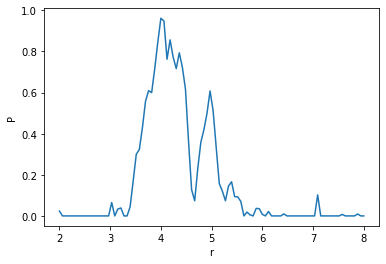

In [14]:
alpha = 0.1
tau = 1/sigma_model**2
delta = (alpha**2)*tau
print('alpha = ' + str(alpha))
print('tau = ' + str(tau))
print('delta = ' + str(delta))

Pdraw = dive.randP(delta,tau,KtK,KtS,LtL,len(r))

plt.plot(r,Pdraw)
plt.xlabel('r')
plt.ylabel('P');

alpha = 1
tau = 399.99999999999994
delta = 399.99999999999994


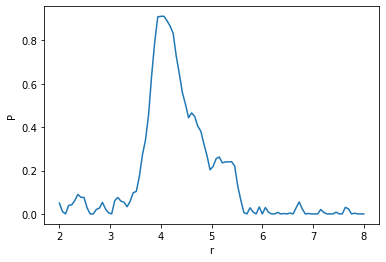

In [15]:
alpha = 1
tau = 1/0.05**2
delta = (alpha**2)*tau
print('alpha = ' + str(alpha))
print('tau = ' + str(tau))
print('delta = ' + str(delta))

Pdraw = dive.randP(delta,tau,KtK,KtS,LtL,len(r))

plt.plot(r,Pdraw)
plt.xlabel('r')
plt.ylabel('P');